In [4]:
import pickle
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objects as go


#PCA, TSNE, UMAP

class Visualize:
    def __init__(self, train_features, train_labels, test_features, test_labels, vis_type, n_comp):
        self.train_features = train_features
        self.train_labels = train_labels
        self.test_features = test_features
        self.test_labels = test_labels
        self.vis_type = vis_type
        self.n_comp = n_comp
        """if self.vis_type == "TSNE":
            self.visualizer = TSNE(n_components=self.n_comp, learning_rate='auto', init='random', perplexity=3).fit(self.train_features)"""
    
    def visualization(self):

        if self.vis_type == "PCA":
            pca = PCA(n_components=2).fit(self.train_features)
            train_embedded = pca.transform(self.train_features)
            test_embedded = pca.transform(self.test_features)


        if self.vis_type == "TSNE":
            train_embedded = TSNE(n_components=self.n_comp, learning_rate='auto', init='random', perplexity=3).fit_transform(self.train_features)
            test_embedded = TSNE(n_components=self.n_comp, learning_rate='auto', init='random', perplexity=3).fit_transform(self.test_features)

        if self.vis_type == 'UMAP':
            reducer = umap.UMAP(n_components=self.n_comp)

            train_scaled_data = StandardScaler().fit_transform(self.train_features)
            test_scaled_data = StandardScaler().fit_transform(self.test_features)
            
            train_embedded = reducer.fit_transform(train_scaled_data)
            test_embedded = reducer.fit_transform(test_scaled_data)
            
        
        if self.n_comp == 2:
            sns.scatterplot(x=train_embedded[:, 0], y=train_embedded[:, 1], hue=self.train_labels, palette='tab10')
            plt.xlabel(f'{self.vis_type} Component 1')
            plt.ylabel(f'{self.vis_type} Component 2')
            plt.title('TRAIN')
            plt.legend(['coast', 'forest', 'highway', 'insidecity', 'mountain', 'Opencountry', 'street', 'tallbuilding'])
            plt.savefig(f'{self.vis_type}_train_2D.png')
            plt.show()
            plt.close()

            sns.scatterplot(x=test_embedded[:, 0], y=test_embedded[:, 1], hue=self.test_labels, palette='tab10')
            plt.xlabel(f'{self.vis_type} Component 1')
            plt.ylabel(f'{self.vis_type} Component 2')
            plt.title('TEST')
            plt.legend(['coast', 'forest', 'highway', 'insidecity', 'mountain', 'Opencountry', 'street', 'tallbuilding'])
            plt.savefig(f'{self.vis_type}_test_2D.png')
            plt.show()
            plt.close()

        if self.n_comp >= 3:

            class_colors = {
                0 : 'blue',
                1: 'red',
                2: 'green',
                3: 'orange',
                4: 'purple',
                5: 'yellow',
                6: 'cyan',
                7: 'magenta',
            }

            classes_names = ['coast', 'forest', 'highway', 'insidecity', 'mountain', 'Opencountry', 'street', 'tallbuilding']

            colors = [class_colors[c] for c in self.train_labels]

            
            fig1 = go.Figure(data=[go.Scatter3d(x=train_embedded[:, 0], y=train_embedded[:, 1], z=train_embedded[:, 2],
                                   mode='markers',
                                   marker=dict(color=colors, size=3)
                                   )])
            
            fig1.update_layout(title=f'3D Train {self.vis_type} Visualization')
            fig1.update_layout(showlegend=True)
            fig1.show()

            colors = [class_colors[c] for c in self.test_labels]

            
            fig2 = go.Figure(data=[go.Scatter3d(x=test_embedded[:, 0], y=test_embedded[:, 1], z=test_embedded[:, 2],
                                   mode='markers',
                                   marker=dict(color=colors, size=3)
                                   )])
            
            fig2.update_layout(title=f'3D Test {self.vis_type} Visualization')
            fig2.update_layout(showlegend=True)
            fig2.show()


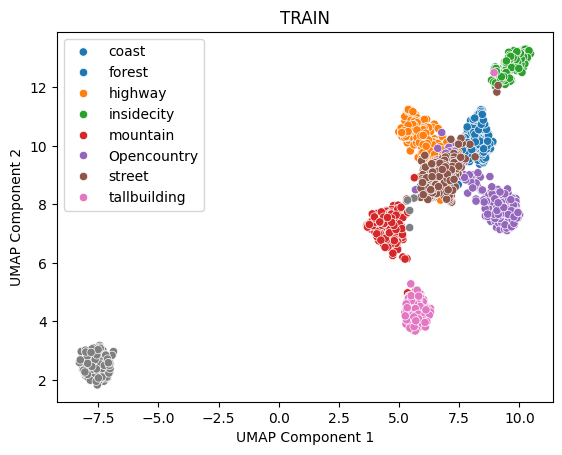

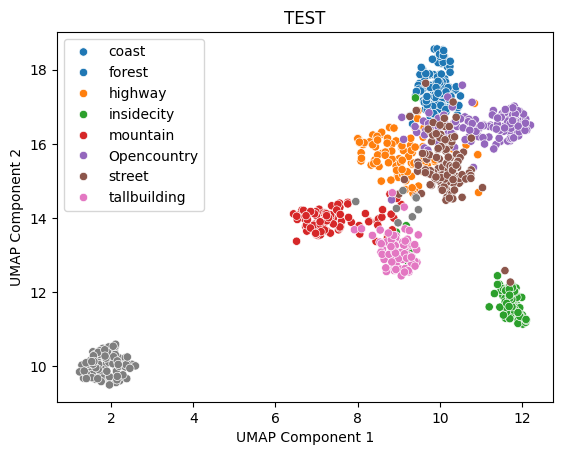

In [7]:
with open('pathsTriplet.pkl', 'rb') as f:
        path_images = pickle.load(f)

train_paths = path_images[1]
test_paths = path_images[0]

with open('tripletPredictions.pkl', 'rb') as f:
    dataset_features = pickle.load(f)

train_features = np.array(dataset_features[1][0])
train_labels = np.array(dataset_features[1][1])

test_features = np.array(dataset_features[0][0])
test_labels = np.array(dataset_features[0][1])

patata = Visualize(train_features = train_features, train_labels = train_labels, test_features = test_features, test_labels = test_labels, vis_type = 'UMAP',n_comp = 2)
patata.visualization()

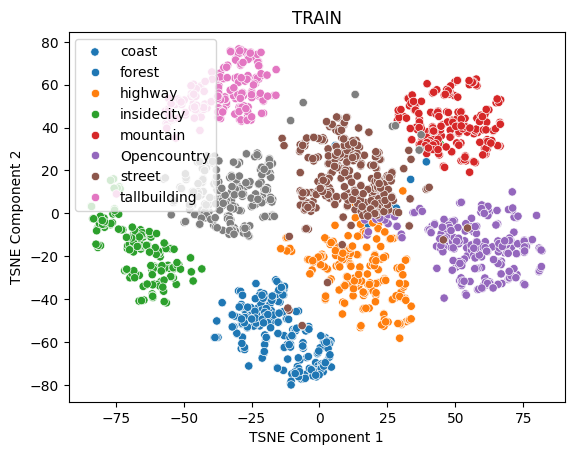

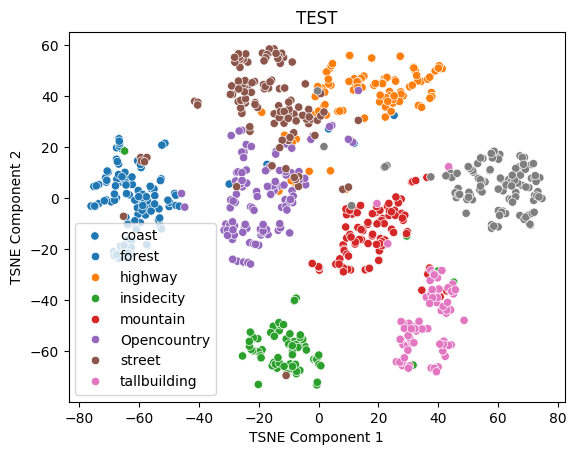

In [8]:
patata = Visualize(train_features = train_features, train_labels = train_labels, test_features = test_features, test_labels = test_labels, vis_type = 'TSNE',n_comp = 2)
patata.visualization()